In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

In [38]:
# Get Voting data by SA2
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [39]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_selected_statistics.csv")

In [40]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")

In [43]:
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [83]:
pdf = df[["STE_NAME16", "Preferred Party", "median_tot_prsnl_inc_weekly"]]
pdf = pdf.groupby(["STE_NAME16","Preferred Party"]).median()
pdf.reset_index(inplace = True)
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]

In [84]:
pdf.head()

,STE_NAME16,Preferred Party,median_tot_prsnl_inc_weekly
0,Australian Capital Territory,ALP,989.0
1,Australian Capital Territory,Liberal,1193.5
2,New South Wales,ALP,607.0
3,New South Wales,Liberal,664.0
4,Northern Territory,ALP,940.0


In [87]:
state_names = pdf.loc[:, "STE_NAME16"].unique()

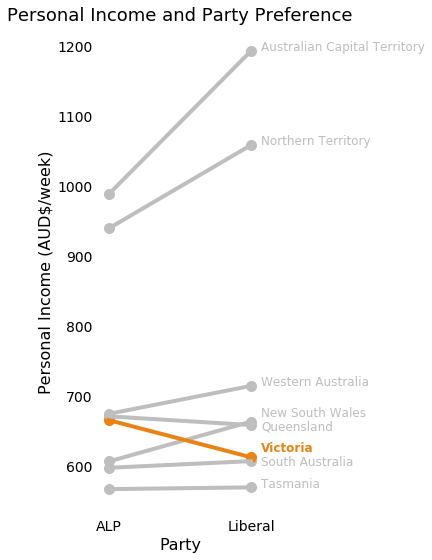

In [152]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,9))

for state in state_names:
    # Set plot values
    parties = pdf.loc[pdf["STE_NAME16"] == state, "Preferred Party"].values
    p_income = pdf.loc[pdf["STE_NAME16"] == state, "median_tot_prsnl_inc_weekly"].values
    
    # Default Values
    state_colour = "#BEBEBE"
    state_weight = "normal"
    state_y = 0
    state_font_size = 12
    
    # Set non standard values
    if state == "Victoria":
        state_colour = "#ea8316"#""#0e870f"
        state_weight = "bold"
        state_y = 5
    elif state == "New South Wales":
        state_y = 5
    elif state == "Queensland":
        state_y = -5
    elif state == "South Australia":
        state_y = -5
        
        
    axes.plot(parties, p_income, c = state_colour, linewidth = 4)
    axes.scatter(parties, p_income, s = 100,c = state_colour)

    for party in parties:
        if party == "Liberal":
            #for x, y in zip(party, p_income[1]):
            axes.annotate(state
                          ,(party,p_income[1])
                          ,textcoords = "offset points"
                          ,xytext = (10,state_y)
                          ,ha = "left"
                          ,color = state_colour
                          ,weight = state_weight
                          ,fontsize = state_font_size)

# Add title
axes.set_title("Personal Income and Party Preference", fontsize = 18)

#Remove tick marks
axes.tick_params(length = 0, labelsize = 14)

# Set label axis
axes.set_xlabel("Party", fontsize = 16)
axes.set_ylabel("Personal Income (AUD$/week)", fontsize = 16)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

In [153]:
fig.savefig("personal_income_results_state.png", dpi = 300, bbox_inches = "tight")

In [154]:
pdf

,STE_NAME16,Preferred Party,median_tot_prsnl_inc_weekly
0,Australian Capital Territory,ALP,989.0
1,Australian Capital Territory,Liberal,1193.5
2,New South Wales,ALP,607.0
3,New South Wales,Liberal,664.0
4,Northern Territory,ALP,940.0
5,Northern Territory,Liberal,1059.0
7,Queensland,ALP,671.5
8,Queensland,Liberal,659.0
9,South Australia,ALP,598.0
10,South Australia,Liberal,607.5
